# The Data Science Blog Post Task of Udacity Data Science Nanodegree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



## Business Understanding

In this project, I will be using the Stackoverflow 2019 Survey results. I will investigate the following questions, which are all related to the remote work opinions about the users pre covid-19. I believe that these are interesting questions as they will show what developers feel about remote work before the pandemic:
- What was Pre Covid-19 remote work preference percentages of Stackoverflow Community?
- How often did Stackoverflow community worked remotely before Covid-19?
- What percentage of the survey respondents find remote work options important when deciding on a new job?
- Does freelancers have a different opinion about remote work?
 

## Data Understanding & Data Preparation 

Let's check what the dataset looks like and which features I can use for looking into remote work ideas.

In [2]:
#read data
df = pd.read_csv('./developer_survey_2019/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [4]:
df.shape

(88883, 85)

In [4]:
#find the columns that have the missing values
nulls = set(df.columns[df.isnull().mean()>0])

In [5]:
nulls
#Some columns have missing values and nulls, this won't be a big problem for me since I will not do any modeling.
#I should take into account the nulls when computing the statistics, thoug

{'Age',
 'Age1stCode',
 'BetterLife',
 'BlockchainIs',
 'BlockchainOrg',
 'CareerSat',
 'CodeRev',
 'CodeRevHrs',
 'CompFreq',
 'CompTotal',
 'Containers',
 'ConvertedComp',
 'Country',
 'CurrencyDesc',
 'CurrencySymbol',
 'DatabaseDesireNextYear',
 'DatabaseWorkedWith',
 'Dependents',
 'DevEnviron',
 'DevType',
 'EdLevel',
 'EduOther',
 'Employment',
 'EntTeams',
 'Ethnicity',
 'Extraversion',
 'FizzBuzz',
 'Gender',
 'ITperson',
 'ImpSyn',
 'JobFactors',
 'JobSat',
 'JobSeek',
 'LanguageDesireNextYear',
 'LanguageWorkedWith',
 'LastHireDate',
 'LastInt',
 'MainBranch',
 'MgrIdiot',
 'MgrMoney',
 'MgrWant',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'OffOn',
 'OpSys',
 'OpenSource',
 'OrgSize',
 'PlatformDesireNextYear',
 'PlatformWorkedWith',
 'PurchaseHow',
 'PurchaseWhat',
 'ResumeUpdate',
 'SOAccount',
 'SOComm',
 'SOFindAnswer',
 'SOHowMuchTime',
 'SOJobs',
 'SONewContent',
 'SOPartFreq',
 'SOTimeSaved',
 'SOVisit1st',
 'SOVisitFreq',
 'SOVisitTo',
 'ScreenName',
 'Sexual

In [9]:
# Let's write a function so that plotting is easier
def barplot_feature(feat, totnum, title):
    """
    Description: This function can be used to bar plot a variable.

    Arguments:
        feat: the counts of feature to plot 
        totnum: the number of total non-null values to plot. 
        title: plot title
    Returns:
        None
    """

    (feat/totnum).plot(kind="bar");
    plt.title(title);


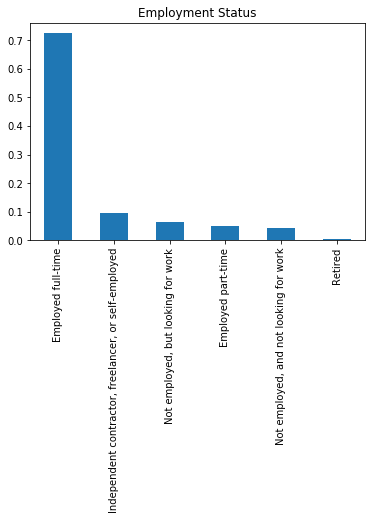

In [10]:
#employment status
emp_vals = df.Employment.value_counts()
barplot_feature(emp_vals, df.shape[0],"Employment Status" )

In [36]:
print(df.Employment.count()/df.shape[0])

0.9808512313940798


In [35]:
print(emp_vals/df.Employment.count())

Employed full-time                                      0.739152
Independent contractor, freelancer, or self-employed    0.097624
Not employed, but looking for work                      0.064234
Employed part-time                                      0.051261
Not employed, and not looking for work                  0.043622
Retired                                                 0.004106
Name: Employment, dtype: float64


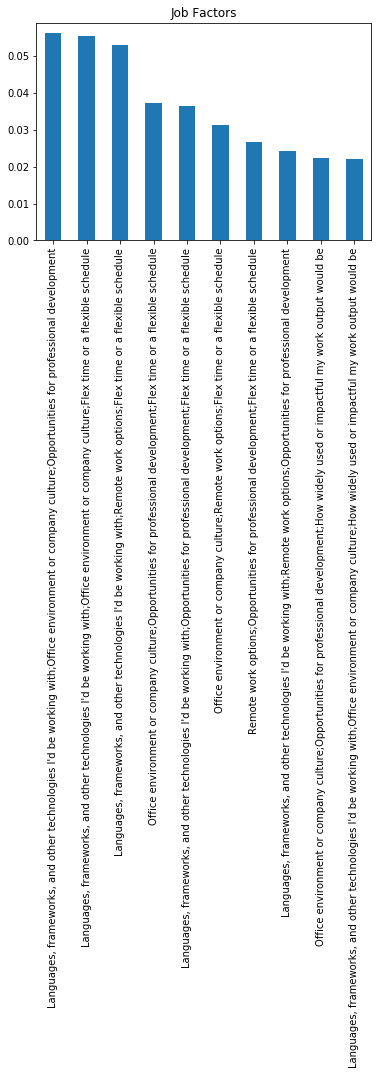

In [11]:
#job factors to affect job decision
jb_vals = df.JobFactors.value_counts();

barplot_feature(jb_vals[:10], df.shape[0],"Job Factors" );

### Answering the question: What was Pre Covid-19 remote work preference percentages of Stackoverflow Community?

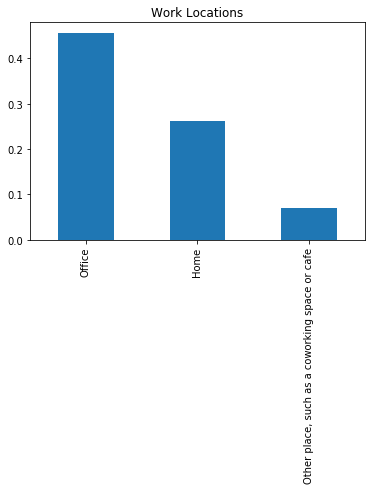

In [12]:
#work locations preferred
wl_vals = df.WorkLoc.value_counts()

barplot_feature(wl_vals[:10], df.shape[0],"Work Locations");

In [19]:
print (wl_vals/df.WorkLoc.count())

Office                                            0.579430
Home                                              0.332282
Other place, such as a coworking space or cafe    0.088288
Name: WorkLoc, dtype: float64


In [22]:
print (df.WorkLoc.count()/df.shape[0]) #only 79% of the rows are filled out, so I should plot the stats accordingly

0.7881709663265192


### Answering the question: How often did Stackoverflow community worked remotely before Covid-19?

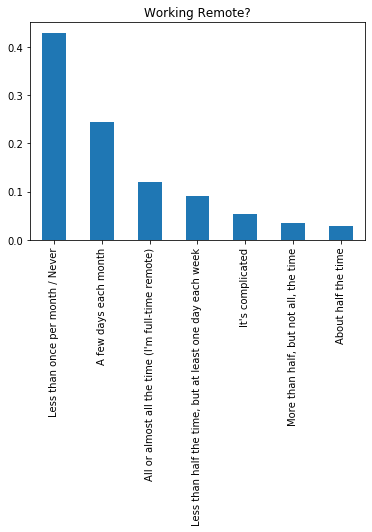

In [14]:
#Working remote

wr_vals = df.WorkRemote.value_counts()

barplot_feature(wr_vals[:10], df.WorkRemote.count(),"Working Remote?");

In [23]:
print (wr_vals/df.WorkRemote.count())

Less than once per month / Never                           0.429970
A few days each month                                      0.245319
All or almost all the time (I'm full-time remote)          0.120440
Less than half the time, but at least one day each week    0.089921
It's complicated                                           0.052288
More than half, but not all, the time                      0.033806
About half the time                                        0.028257
Name: WorkRemote, dtype: float64


In [24]:
print (df.WorkRemote.count()/df.shape[0])

0.7907473870143897


### Answering the question: What percentage of the survey respondents find remote work options important when deciding on a new job?

In [30]:
#explore the job factors that affect offer decision

print (df.JobFactors.count()/df.shape[0])  #only 83% of the rows are filled out, so I should plot the stats accordingly

0.8929829101177953


In [28]:
count = df['JobFactors'].str.contains('Remote work options', na=False).sum()

In [29]:
print(count)

25176


In [31]:
print(count/df.JobFactors.count())

0.317193937332275


### Filter out freelancers: will investigate the question: Does freelancers have a different opinion about remote work?



In [16]:
freelancers=df[df['Employment']=='Independent contractor, freelancer, or self-employed']

### Answering the Question: Does freelancers work remote more often?

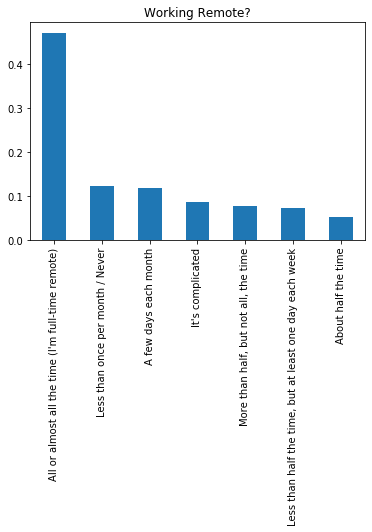

In [17]:
fwr_vals = freelancers.WorkRemote.value_counts()

barplot_feature(fwr_vals[:10], freelancers.WorkRemote.count(),"Working Remote?");

In [38]:
print(fwr_vals[:10]/freelancers.WorkRemote.count())

All or almost all the time (I'm full-time remote)          0.470632
Less than once per month / Never                           0.123109
A few days each month                                      0.117918
It's complicated                                           0.086325
More than half, but not all, the time                      0.076535
Less than half the time, but at least one day each week    0.072975
About half the time                                        0.052507
Name: WorkRemote, dtype: float64


### Answering the question: does freelancers prefer remote work more?

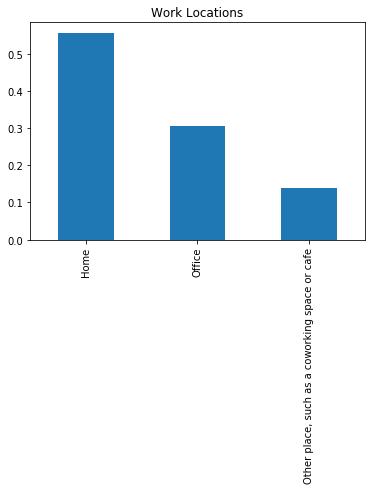

In [18]:
#work locations preferred
fwl_vals = freelancers.WorkLoc.value_counts()

barplot_feature(fwl_vals[:10], freelancers.WorkLoc.count(),"Work Locations");

In [40]:
print(fwl_vals[:10]/freelancers.WorkLoc.count())

Home                                              0.556956
Office                                            0.305399
Other place, such as a coworking space or cafe    0.137645
Name: WorkLoc, dtype: float64


In [41]:
f_count = freelancers['JobFactors'].str.contains('Remote work options', na=False).sum()

In [42]:
print(f_count/freelancers.JobFactors.count())

0.5236539466806064


## Results Evaluation 

The summary of the analysis:
The developer community loves remote-work, and freelancers love remote work even more!

What was Pre Covid-19 remote work preference percentages of Stackoverflow Community? 79% of the survey respondents answered the question “Where would you prefer to work?”. Of the ones who have answered this question, 58% would like to work in an office, 33% would like to work for home, and 9% would like to work in an other place.

How often did Stackoverflow community worked remotely before Covid-19? 79% of the survey respondents answered the question “How often do you work remotely?”. Of the ones who have answered this question, the results are: Less than once per month / Never 43%, A few days each month 25%, All or almost all the time (I’m full-time remote) 12%, Less than half the time, but at least one day each week 9%, It’s complicated 5%, More than half, but not all, the time 3%, About half the time 3%

What percentage of the survey respondents find remote work options important when deciding on a new job? 89% of the survey respondents answered the question “Imagine that you are deciding between two job offers with the same compensation, benefits, and location. Of the following factors, which 3 are MOST important to you?”.
Out of them, 32% think that remote work options is one the most important three factors when deciding on a job offer with the same ground.

Does freelancers have a different opinion about remote work? Definitely! 47% of freelancers are working remote almost all the time (this is huge when compared to the 12% all-times-remote workers of the entire respondents) 56% of the freelancers prefer to work from home. Interestingly, this ratio is smaller than the 58% of the entire community preferring to work from home. We can have a guess that freelancers have become bored of working from home all the time :).
